# Wprowadzenie do pracy w Google Colab
Google Colab bazuje na Jupyter Notebook.

**Aby uruchomić kod kliknij we fragment kodu i wciśnij Ctrl+Enter**
## Import pakietów
Punktem wyjścia do prac będa pakiety numpy, pandas i csv umozliwiajace kolejno: wygodne obliczenia i operacje na wektorach, reprezenacje i wizualizację dużych porcji danych, wczytywanie danych treningowych z formatu CSV.
Oprócz tego w przypadku korzystania z Google Colab koniecznym będze import modułów pozwalajacych na upload plików z danymi treningowymi na serwer.

In [53]:
import pandas as pd
import numpy as np
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, Normalizer, StandardScaler
import csv
import io

# Zadania
## Wczytaj plik z danymi, który znajduje się tutaj: [House sales - real dataset]('https://szymon.bobek.re/kc_house_data_moreal_full.csv')

**Zwróć uwagę, że niektórych danych brakuje** Nie są to jednak typowe dla Pandas i Numpy `np.NaN`. Plik znajduje sie również pod adresem: `https://szymon.bobek.re/kc_house_data_moreal_full.csv`

Zastąp brakujące wartości wartośćią `np.NaN`


In [3]:
df = pd.read_csv('https://szymon.bobek.re/kc_house_data_moreal_full.csv', sep=";")
df.set_index('id')
df
df.replace('?', np.NaN, inplace=True)


## Brakujące wartości
Zwizualizuj elementy brakujące wykorzystując heatmap z pakietu
seaborn
``` python
import seaborn as sns
```

<Axes: >

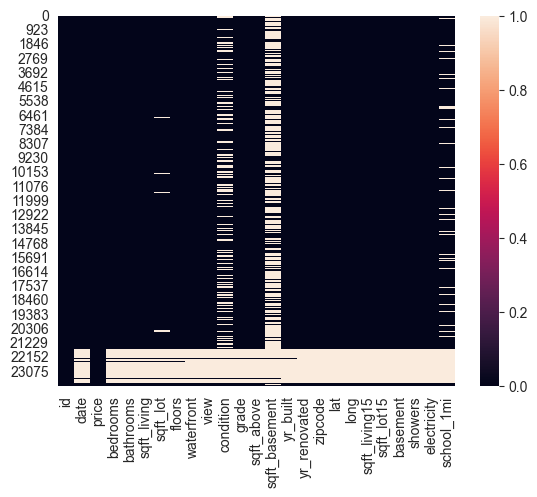

In [4]:
import seaborn as sns
import matplotlib.pyplot as plt
ax = plt.axes()
sns.heatmap(df.isna())

## Na podstawie wyników zdecyduj co zrobić z brakujacymi elementami:
  1. Usunąć rekordy z brakujacymi danymi
  2. Uzupełnić je średnią, mediana, lub dominantą
  3. Zastosować coś bardziej fancy, np. [Imputer](https://scikit-learn.org/stable/modules/generated/sklearn.impute.SimpleImputer.html)



<Axes: >

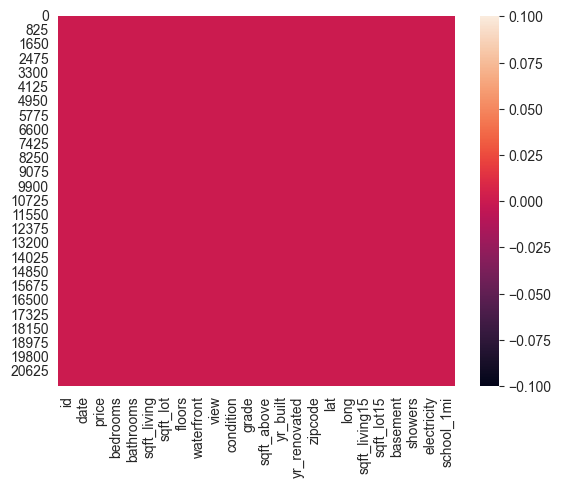

In [5]:
try:
    df = df.drop('sqft_basement', axis=1)
except:
    pass
# pd.set_option("display.max_rows", None, "display.max_columns", None)
df = df[(df['id'] <= 21229 ) | (df['id'] >= 23774)]
#df['condition'].isna().value_counts() #check how many condition data is missing
condition = df[['condition']]

#condition column imputed:

imp = SimpleImputer(missing_values=np.NaN, strategy='most_frequent')
imp2 = SimpleImputer(missing_values=np.NaN, strategy='mean')
imp.fit(condition)
imp2.fit(df[['sqft_lot']])
condition_imputed  = imp.fit_transform(condition)
sqft_lot_imputed = imp2.fit_transform(df[['sqft_lot']])
df['condition'] = condition_imputed[:, 0]
df['sqft_lot'] = sqft_lot_imputed[:, 0]

imp.fit(df[['school_1mi']])
school_imputed  = imp.fit_transform(condition)
df['school_1mi'] = school_imputed[:, 0]


sns.heatmap(df.isna())
# df['condition']

## Wyświetl zalezność pomiędzy powierzchnią domu a ceną domu wykorzystując  
  - [DataFrame.plot.scatter](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.plot.scatter.html)
  - [scatterplot](https://seaborn.pydata.org/generated/seaborn.scatterplot.html) z pakietu seaborn


W dalszej częsci wybieraj dogodną dla siebie formę plottowania (albo seaborn albo matplotlib)

<Axes: xlabel='sqft_lot', ylabel='price'>

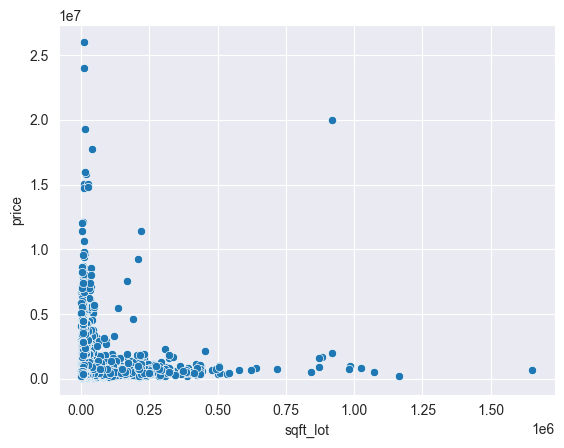

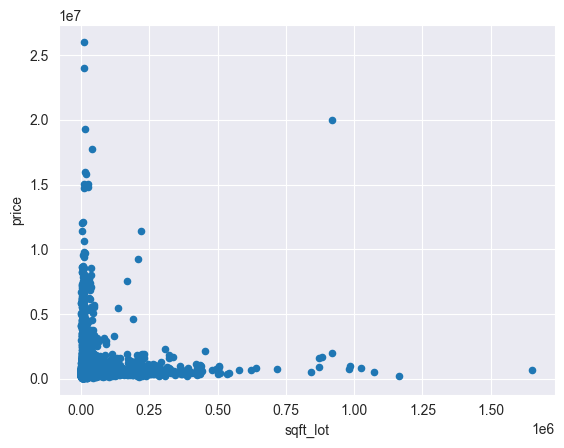

In [6]:
lotPrice = pd.DataFrame(data={'sqft_lot':df['sqft_lot'],'price':df['price']})
sns.scatterplot(data=lotPrice, x='sqft_lot', y='price')
df.plot.scatter(x='sqft_lot', y='price')

## Zobrazuj rozkład cen domów (użyj [DataFrame.plot.hist](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.plot.hist.html))
Pomanipuluj parametrem *bins*. Do czego on służy? Czym histogram różni się od scatter plot? Do czego może się przydać?

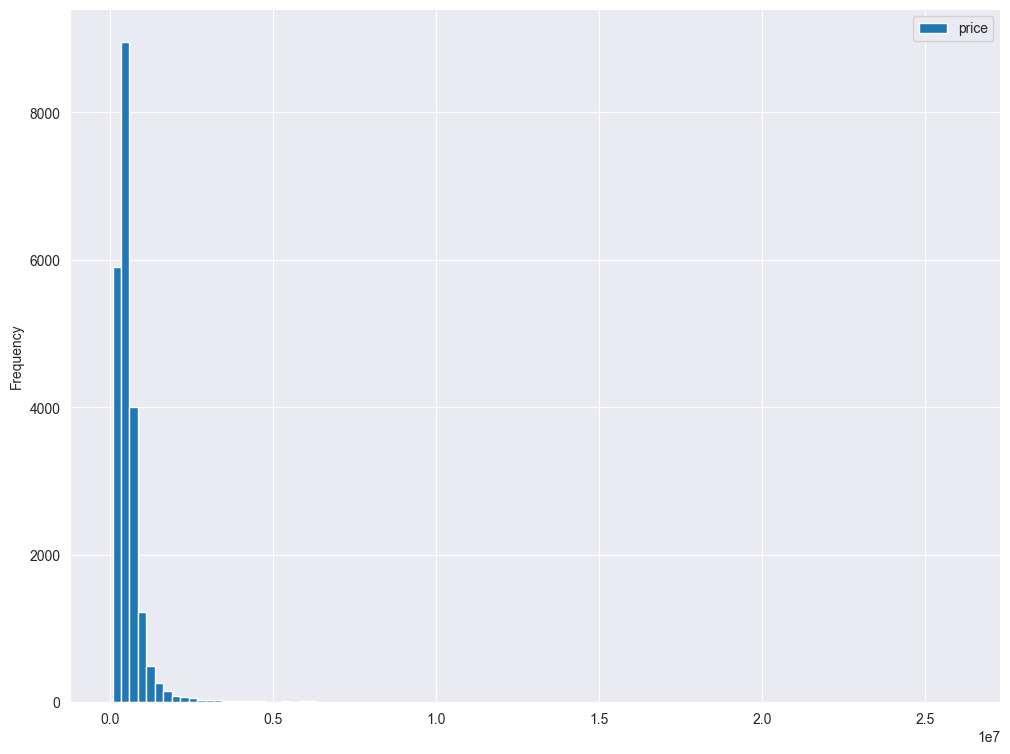

In [7]:
# df.describe(include="all")
# df.dtypes
# df.shape
ax = df.plot.hist(column='price', bins=100, figsize=(12,9))

## Zrób wykres typu [barplot](https://matplotlib.org/devdocs/api/_as_gen/matplotlib.pyplot.bar.html) (lub [barplot](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.plot.bar.html) dla Pandas) dla różnych kodów pocztowych (oś pozioma) i średniej ceny domów. Wyrysuj tylko 10 regionów o najwyższej średniej cen domów

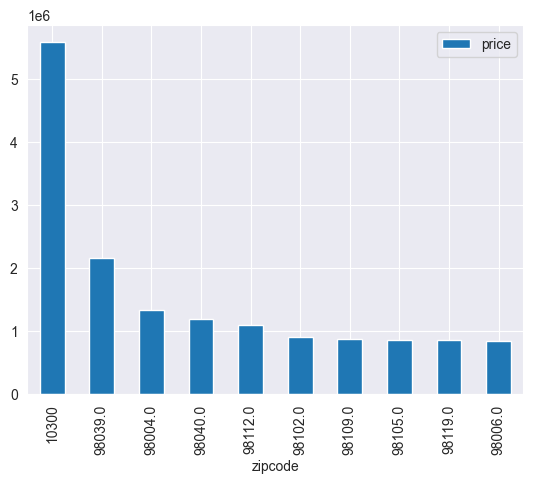

In [8]:
data = {
    'price':df['price'],
    'zipcode':df['zipcode']
}
priceZipcodeDf = pd.DataFrame(data=data)
groupedByZipcode = priceZipcodeDf.groupby(by=['zipcode']).mean().sort_values(by='price', ascending=False)
groupedByZipcode2 = groupedByZipcode[0:10]
groupedByZipcode2.reset_index(inplace=True)
groupedByZipcode.reset_index(inplace=True)
barPlot = groupedByZipcode2.plot.bar(y='price', x='zipcode')

## Zrób wykres typu [boxplot](https://matplotlib.org/gallery/pyplots/boxplot_demo.html) (lub [boxplot](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.boxplot.html) dla Pandas) dla zestawu danych jak powyżej, ale wybierz 10 **losowych** zipcodów które wyrysujesz , użyj opcji notch=True. Czy widać jakąś zależność pomiędzy zipcodami a cenami domów?

    zipcode         price
0     10300  5.575112e+06
1   98039.0  2.166639e+06
2   98004.0  1.344397e+06
3   98040.0  1.188735e+06
4   98112.0  1.096522e+06
..      ...           ...
66  98148.0  2.849086e+05
67  98001.0  2.784787e+05
68  98032.0  2.512962e+05
69  98168.0  2.399753e+05
70  98002.0  2.337708e+05

[71 rows x 2 columns]


<Axes: >

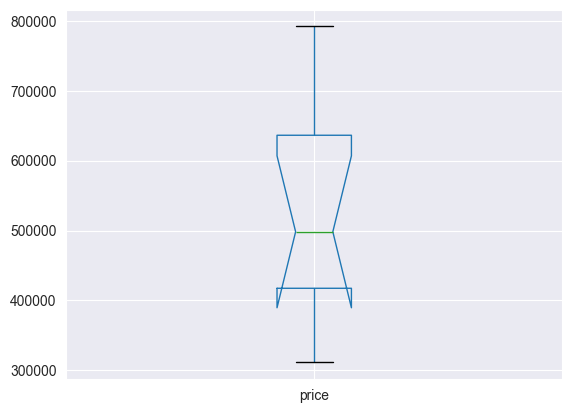

In [78]:
# zsample = df['zipcode'].sample(10)
# mask = df['zipcode'].isin(zsample)
# plt.figure(figsize=(12,9))
# sns.barplot(x=df[mask].zipcode, y=df[mask].price)
print(groupedByZipcode)
randomBoxPlot = groupedByZipcode.sample(n=10)
randomBoxPlot.boxplot(notch=True)

## Zakoduj zmienne które nie są numeryczne z wykorzystaniem [OneHotEncodera]((https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.OneHotEncoder.html) z scikit learn (np. state) i znormalizuj dane numeryczne z wykorzystaniem [StandardScalera](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html). Użyj do tego [ColumnTransformera](https://scikit-learn.org/stable/modules/generated/sklearn.compose.ColumnTransformer.html).

Zmienną nienumeryczną jest na przykład **zipcode**

In [104]:
#OneHotEncoder


dfCopy = df
# dfCopy
# encoder.fit(df[['zipcode']])
# ct = ColumnTransformer(
#     transformers = [("encoder", OneHotEncoder( sparse_output=False, feature_name_combiner="concat"), ['zipcode'])]
# )
# ct.fit_transform(dfCopy)
# dfCopy
encoder = OneHotEncoder(sparse_output=False)
oneHotEncoded = encoder.fit_transform(df[['zipcode']])
one_hot_df = pd.DataFrame(oneHotEncoded, columns=encoder.get_feature_names_out(['zipcode']))
df_encoded = pd.concat([df, one_hot_df], axis=1)
df_encoded = df_encoded.drop(['zipcode'], axis=1)
df_encoded = df_encoded.dropna() # idk why się tworzą NaN po użyciu OHE


#StandardScaler
dfToCorr = df
dfToCorr = dfToCorr.drop(['date','electricity','id'], axis=1)
scaler = StandardScaler()
scaler.fit(dfToCorr)
scaler.transform(dfToCorr)
# dfToCorr
# df_encoded[df_encoded.isna().any(axis=1)]
# sns.heatmap(df_encoded.isna())

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,...,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,basement,showers,school_1mi
0,2.219000e+05,3.0,1.0,1180.0,5650.0,1.0,0.0,0.0,3.0,7.0,...,1955.0,0.0,98178.0,47.5112,-122.257,1340.0,5650.0,0.0,1.0,3.0
1,5.380000e+05,3.0,2.25,2570.0,7242.0,2.0,0.0,0.0,3.0,7.0,...,1951.0,1991.0,98125.0,47.721000000000004,-122.319,1690.0,7639.0,1.0,2.0,3.0
2,1.800000e+05,2.0,1.0,770.0,10000.0,1.0,0.0,0.0,3.0,6.0,...,1933.0,0.0,98028.0,47.7379,-122.23299999999999,2720.0,8062.0,0.0,1.0,3.0
3,6.040000e+05,4.0,3.0,1960.0,5000.0,1.0,0.0,0.0,5.0,7.0,...,1965.0,0.0,98136.0,47.5208,-122.39299999999999,1360.0,5000.0,1.0,3.0,5.0
4,5.100000e+05,3.0,2.0,1680.0,8080.0,1.0,0.0,0.0,3.0,8.0,...,1987.0,0.0,98074.0,47.6168,-122.045,1800.0,7503.0,0.0,2.0,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23985,3.551194e+06,2.0,1.0,1100.0,7500.0,1.0,0.0,0.0,3.0,7.0,...,1951.0,0.0,10300,40.5741209119325,-73.83715674430324,1920.0,7149.0,0.0,1.0,3.0
23986,7.421194e+06,4.0,2.5,3030.0,8335.0,2.0,0.0,0.0,3.0,10.0,...,1992.0,0.0,10300,40.56841736779413,-74.19214663394295,2850.0,8678.0,0.0,3.0,3.0
23987,4.431194e+06,3.0,1.5,1540.0,7200.0,1.0,0.0,0.0,3.0,7.0,...,1968.0,0.0,10300,40.64270631751238,-73.85009153163863,1560.0,7500.0,0.0,1.0,3.0
23988,2.871194e+06,3.0,1.75,1600.0,7500.0,1.0,0.0,0.0,3.0,7.0,...,1998.0,0.0,10300,40.85791731622323,-74.01187972216891,1620.0,7461.0,0.0,2.0,3.0


## Po normalizacji oblicz macież korelacji pomiędzy parametrami numerycznymi a ceną domu i wyrysują ją przy pomocy heatmap z pakietu seaborn. Które z parametrów są najsilniej skorelowane?

<Axes: >

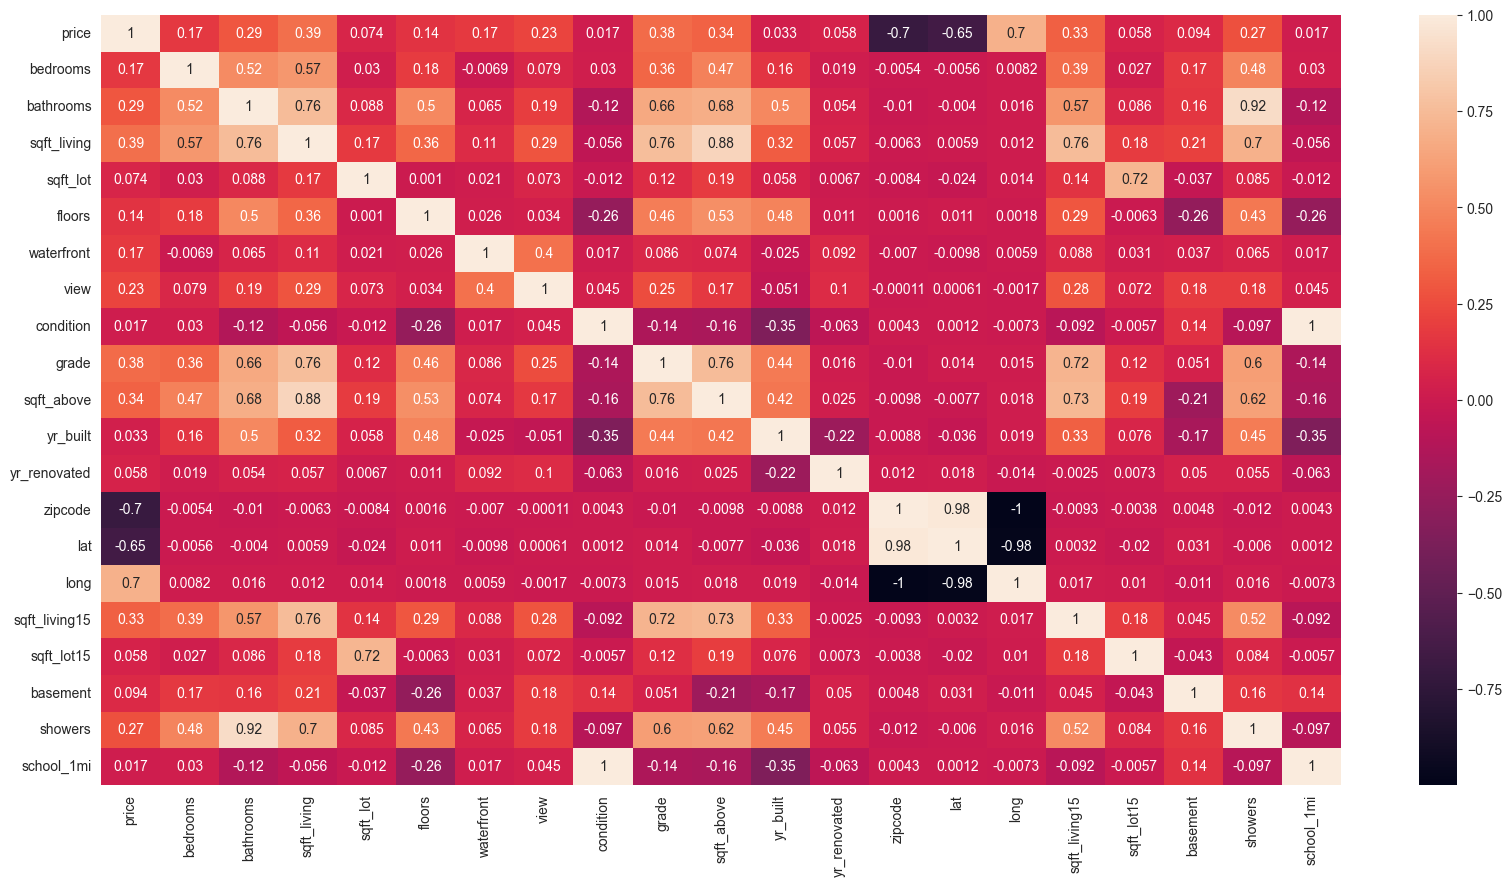

In [103]:
corr = dfToCorr.corr(method='pearson')
fig,ax = plt.subplots(figsize=(20,10))
sns.heatmap(corr, annot=True, ax=ax)

## Wyrysuj lokalizację poszczególnych domów na mapie USA. Zaznacz wartość sprzedanego domu za pomocą koloru, lub rozmiaru "kropki" na mapie. Możesz wykorzystać [Plotly](https://plotly.com/python/maps/)